In [1]:

from econometron.Models import RE_model

In [2]:
# Model setup
equations = [
    "-C_t**(-sigma) + beta * C_tp1**(-sigma) * (alpha * A_tp1 * K_tp1**(alpha-1) + 1 - delta) = 0",
    "C_t + K_tp1 - A_t * K_t**alpha - (1 - delta) * K_t = 0",
    "-log(A_tp1) + rho_a * log(A_t) + epsilon = 0",
]

variables = ['A','K','C']
states = ['A','K']
exo_states = ['A']
endo_states = ['K']
shocks = ['epsilon']
parameters = {
    'sigma': 1.5,    # Risk aversion
    'beta': 0.99,    # Discount factor
    'alpha': 0.35,   # Capital share
    'delta': 0.025,  # Depreciation rate
    'rho_a': 0.9,
    'epsilon':0.01# Technology persistence
}

# Analytical steady state for initial guess
sigma, beta, alpha, delta, rho_a = parameters['sigma'], parameters['beta'], parameters['alpha'], parameters['delta'], parameters['rho_a']
initial_guess = [1,1]

In [3]:
# Initialize and run model
RBC = RE_model(
    equations=equations,
    variables=variables,
    exo_states=exo_states,
    endo_states=endo_states,
    shocks=shocks,
    parameters=parameters,
)

In [4]:
RBC.set_initial_guess(initial_guess)
RBC.normalize={'A':1}
RBC.compute_ss(guess=initial_guess, method='fsolve', options={'xtol': 1e-8})

Steady-state residuals: [-1.77851329e-13  9.03721542e-14 -1.00000000e-02]


A     1.000000
K    34.398226
C     2.589794
dtype: float64

In [ ]:
RBC._Analytical_jacobians(debug=True) # this is normally an internal func but here u go 

Reordered variables: ['A', 'K', 'C']
linear
Equation to variable mapping: {0: 'A', 1: 'K', 2: 'C'}
Reordering index: [0, 1, 2]
Equation 1: -C_t**(-sigma) + beta * C_tp1**(-sigma) * (alpha * A_tp1 * K_tp1**(alpha-1) + 1 - delta) = 0, shock_terms: 0
0
Equation 1, shock epsilon, derivative: 0
Equation 2: C_t + K_tp1 - A_t * K_t**alpha - (1 - delta) * K_t = 0, shock_terms: 0
0
Equation 2, shock epsilon, derivative: 0
Equation 3: -log(A_tp1) + rho_a * log(A_t) + epsilon = 0, shock_terms: epsilon
1
Equation 3, shock epsilon, derivative: 1


(array([[-8.33790428e-03,  1.57555735e-04,  1.38972249e-01],
        [ 0.00000000e+00, -1.00000000e+00,  0.00000000e+00],
        [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00]]),
 array([[ 0.        ,  0.        ,  0.13897225],
        [-3.44974994, -1.01010101,  1.        ],
        [ 0.9       ,  0.        ,  0.        ]]),
 array([[0.],
        [0.],
        [1.]]))

In [ ]:
RBC.approximate() #uses num by default

(array([[-8.33790428e-03,  1.57555735e-04,  1.38972249e-01],
        [ 0.00000000e+00, -1.00000000e+00,  0.00000000e+00],
        [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00]]),
 array([[ 0.        ,  0.        ,  0.13897225],
        [-3.44974994, -1.01010101,  1.        ],
        [ 0.9       ,  0.        ,  0.        ]]),
 array([[0.],
        [0.],
        [1.]]))

In [8]:
RBC.solve_RE_model()
print("Policy Function (f):\n", RBC.f)
print("State Transition (p):\n", RBC.p)

Policy Function (f):
 [[0.59492193 0.03861978]]
State Transition (p):
 [[0.9        0.        ]
 [2.85482802 0.97148123]]


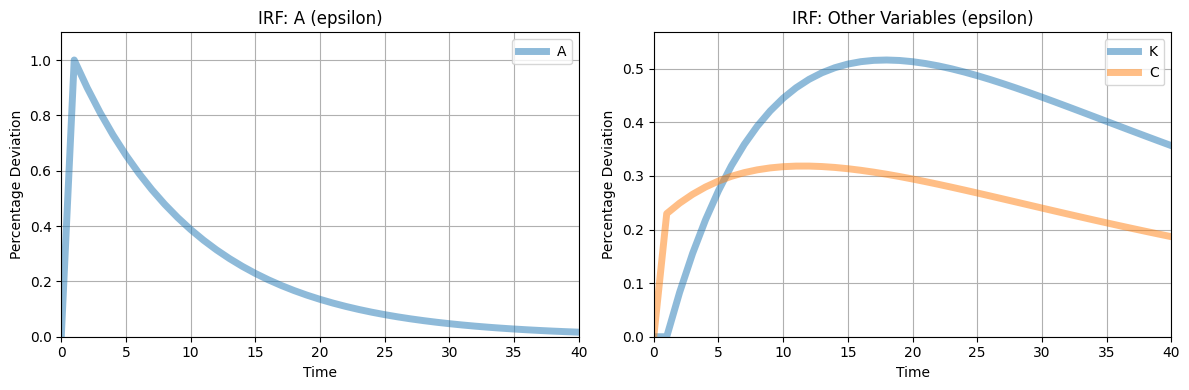

In [9]:
RBC.plot_irfs()

In [12]:
import numpy as np
import pandas as pd

In [13]:
RBC.simulate(T=51, drop_first=10, covariance_matrix=np.array([[0.01**2]]))

,epsilon_t,A_t,K_t,C_t
0,-0.014781,-0.007017,0.003148,0.000003
1,0.011630,0.005315,0.002476,0.002491
2,0.006945,0.011729,0.002846,0.004154
3,-0.000470,0.010086,0.003738,0.004235
4,0.001797,0.010875,0.004469,0.004790
5,-0.019408,-0.009621,0.005244,0.000480
6,-0.012741,-0.021399,0.004296,-0.002712
7,-0.015740,-0.034999,0.002397,-0.006810
8,-0.012394,-0.043893,-0.000576,-0.010378
9,0.002318,-0.037186,-0.004202,-0.010698


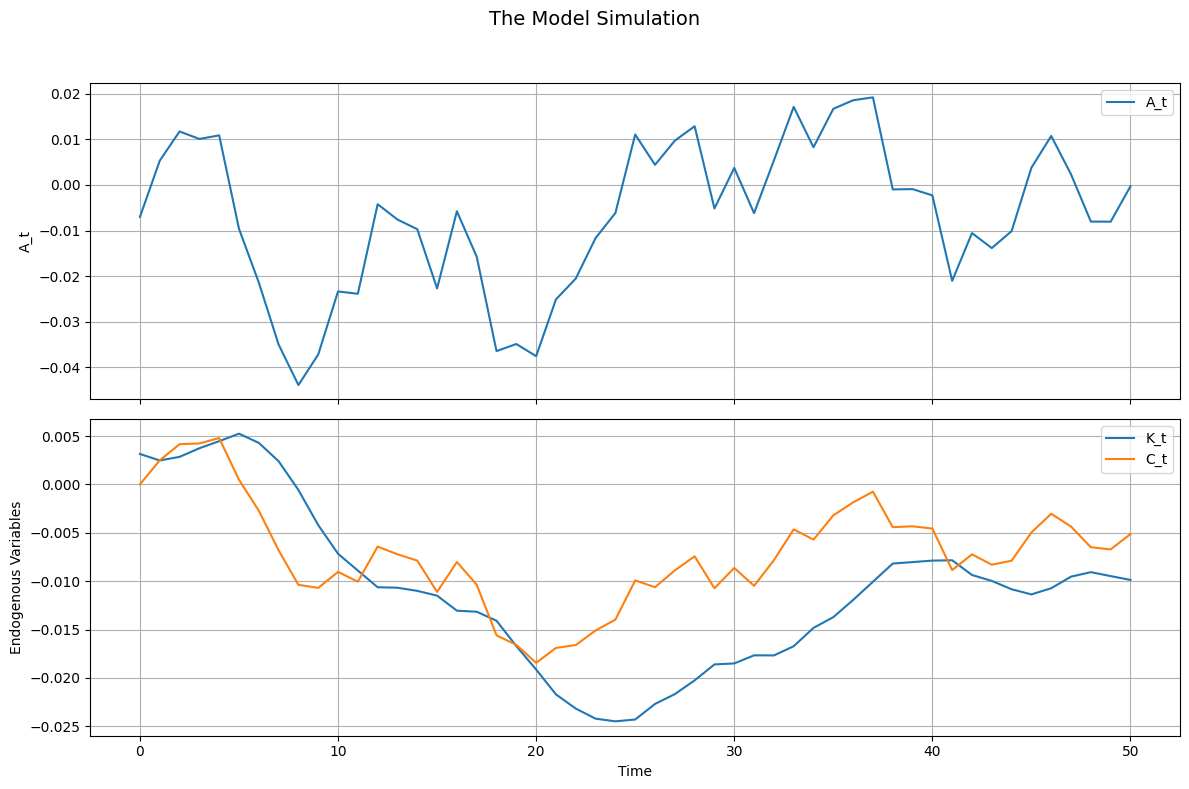

In [14]:
RBC.simulations()